In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
import requests

sns.set_style('whitegrid')

In [153]:
arrest_data = requests.get('https://www.ethnicity-facts-figures.service.gov.uk/crime-justice-and-the-law/policing/number-of-arrests/latest/downloads/number-of-arrests.csv').content
arrest_df = pd.read_csv(io.StringIO(arrest_data.decode('utf-8')))
arrest_df = arrest_df.drop(columns=['Notes'])
arrest_df = arrest_df.dropna()
arrest_df = arrest_df[arrest_df['Age_Group'] == 'All']
arrest_df = arrest_df[arrest_df['Gender'] == 'All']

In [196]:
def clean_data(location, df):
  df_new = df[df['Geography'] == location]
  df_new = df_new.pivot(index='Time', columns='Ethnicity' ,values=' Number of arrests ')
  df_new = df_new.convert_dtypes()
  df_new = df_new.apply(lambda x: x.str.replace(',', ''))
  df_new = df_new.astype(int)
  return df_new

In [205]:
arrest_df_all = clean_data('All', arrest_df)
arrest_df_london = clean_data('London, City of', arrest_df)
# arrest_df_suffolk = clean_data('Suffolk', arrest_df)
arrest_df_manchester = clean_data('Greater Manchester', arrest_df)
arrest_df_essex = clean_data('Essex', arrest_df)


ValueError: ignored

In [199]:
arrest_df_essex

,All,Any other asian,Any other black background,Any other ethnic group,Any other mixed/multiple ethnic background,Any other white background,Asian,Bangladeshi,Black,Black African,Black Caribbean,Chinese,Indian,Mixed,Mixed White and Asian,Mixed White and Black African,Mixed White and Black Caribbean,Other,Pakistani,Unreported,White,White British,White Irish
Time,,,,,,,,,,,,,,,,,,,,,,,
2006/07,33782,251,217,269,182,2320,749,166,1866,1025,624,159,185,664,95,102,285,428,147,564,29511,26945,246
2007/08,55059,473,410,457,347,3896,1176,231,3204,1813,981,308,278,1088,104,177,460,765,194,632,48194,43837,461
2008/09,53383,582,383,396,313,3110,1306,208,2852,1639,830,204,286,1092,138,143,498,600,230,451,47082,43568,404
2009/10,44913,315,438,285,348,12208,1029,263,2307,1333,536,210,218,973,135,118,372,495,233,283,39826,26657,961
2010/11,39632,313,364,268,250,3176,936,186,2129,1199,566,62,224,916,86,127,453,330,213,297,35024,31560,288
2011/12,35991,249,382,238,270,2699,800,171,1955,1077,496,70,197,933,72,138,453,308,183,369,31626,28646,281
2012/13,29883,266,325,179,204,2653,754,148,1590,830,435,54,152,758,57,117,380,233,188,237,26311,23401,257
2013/14,30462,271,308,165,219,2531,744,141,1578,903,367,52,165,746,67,101,359,217,167,264,26913,24087,295
2014/15,27714,232,388,175,212,2231,644,161,1737,871,478,37,124,741,61,95,373,212,127,258,24122,21632,259


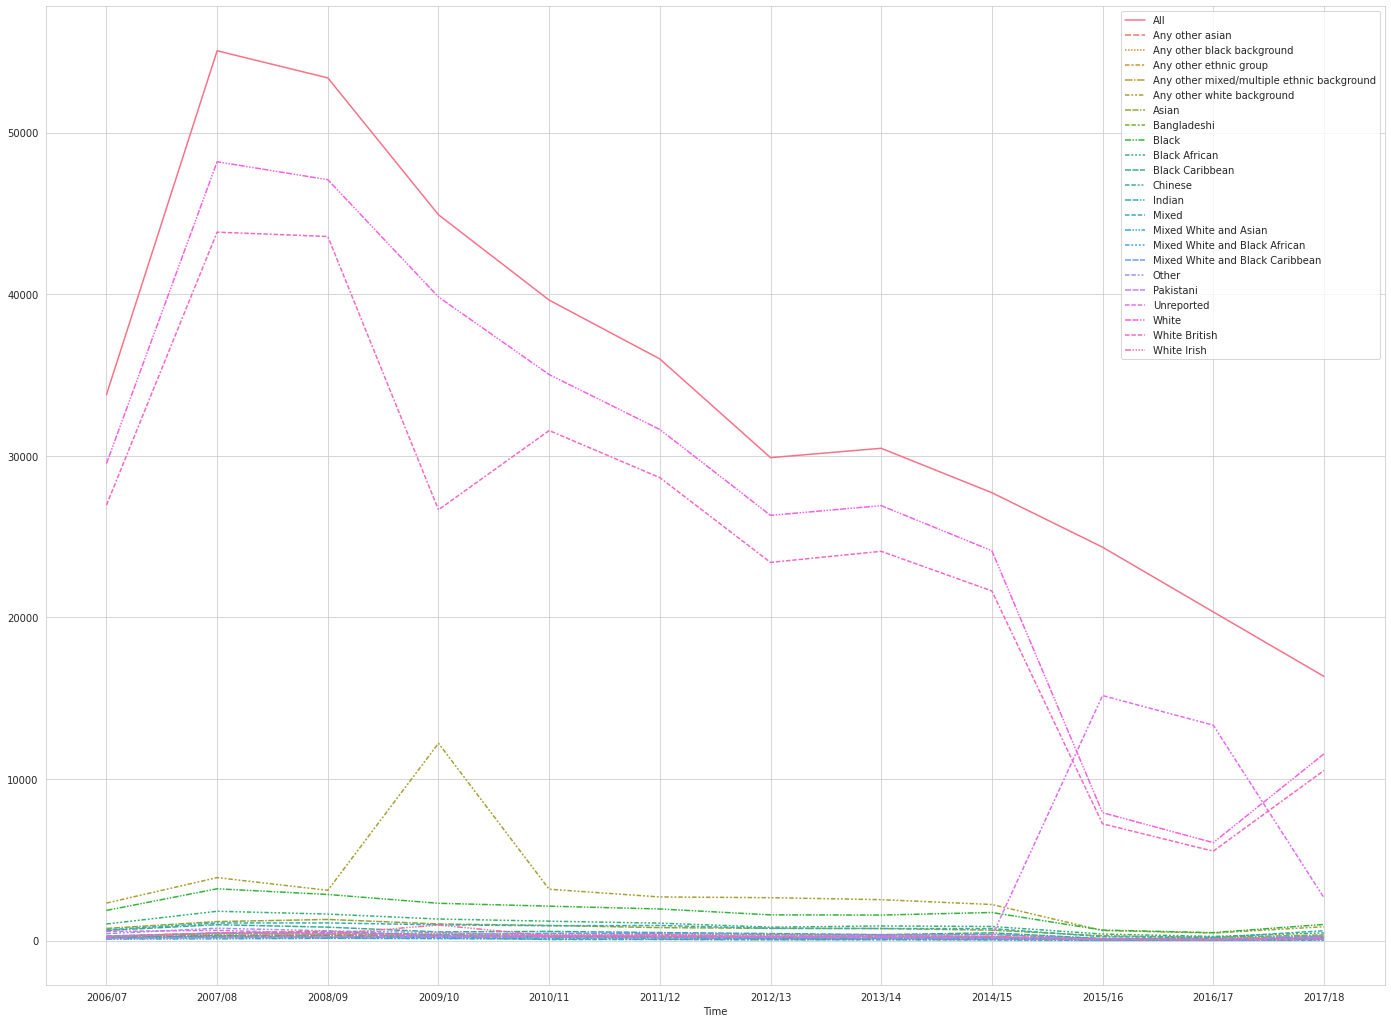

In [195]:
fig, ax = plt.subplots(figsize=(24,18))
sns.lineplot(data=arrest_df_essex)

Arrests in the UK by ethnicity by area across uk (city(urban area), small town/village(rural b area)) 

First use a classification method to classify what sort of area places are

get arrest data on a mix of different places from each category from different regions in the uk over a set period




How can you remove ai bias from an algorithm which is designed to find social bias?


Filter arrest data by all age, all genders
